# Retail Display Strategy Analysis

The project aims to leverage the available data to understand the factors influencing the display of products in stores. By utilizing this information, it's possible to develop more effective strategies to boost sales, enhance product visibility, and optimize commercial performance.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import warnings
from scipy.stats import mstats
import json
from MDLP import MDLP_Discretizer

In [2]:
df = pd.read_csv('new_Base_CDM_balanced_V2.csv', sep=';',header=0)

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [4]:
# rename columns : Y to y_dsiplay
df.rename(columns={'Y':'y_display',
                   'X1':'X1_cor_sales_in_vol',
                   'X2':'X2_cor_sales_in_val',
                   'X3':'X3_CA_mag',
                   'X4':'X4_value',
                   'X5':'X5_ENSEIGNE',
                   'X6':'X6_VenteConv',
                   'X7':'X7_Feature'}, inplace=True)

# delete first row
df = df.iloc[1:]

In [5]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   y_display            25782 non-null  object
 1   X1_cor_sales_in_vol  25782 non-null  object
 2   X2_cor_sales_in_val  25782 non-null  object
 3   X3_CA_mag            25782 non-null  object
 4   X4_value             25782 non-null  object
 5   X5_ENSEIGNE          25782 non-null  object
 6   X6_VenteConv         25782 non-null  object
 7   X7_Feature           25782 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


- We can see that there is no missing values in the dataset.
- the dataset has 25782 rows and 8 columns.
- the type of the columns should be changed to the correct type.
- the dataset contains 3 categorical variables and 5 numerical variables.
- after some research we found a possible intepretation of our columns : 

    1. **y_display**: Indicates if an item was displayed ('Displ') or not ('No_Displ').

    2. **X1_cor_sales_in_vol**: Possibly represents the correlated sales volume of the item.

    3. **X2_cor_sales_in_val**: Likely represents the correlated sales value of the item.

    4. **X3_CA_mag**: Interpreted as the total turnover (Chiffre d'Affaires) of the store.

    5. **X4_value**: Represents a certain value associated with the item, although its exact nature remains unclear without further context.

    6. **X5_ENSEIGNE**: This seems to be the name of the store where the item is sold.

    7. **X6_VenteConv**: Potentially represents the conventional sales of the item.

    8. **X7_Feature**: This could indicate whether the item was featured ('Feat') or not ('No_Feat').


In [7]:
# categorical variables : X5_ENSEIGNE, X7_Feature, y_display
df['X5_ENSEIGNE'] = df['X5_ENSEIGNE'].astype('category')
df['X7_Feature'] = df['X7_Feature'].astype('category')
df['y_display'] = df['y_display'].astype('category')

# numerical variables : X1_cor_sales_in_vol, X2_cor_sales_in_val, X3_CA_mag, X4_value, X6_VenteConv
df['X1_cor_sales_in_vol'] = df['X1_cor_sales_in_vol'].astype('float')
df['X2_cor_sales_in_val'] = df['X2_cor_sales_in_val'].astype('float')
df['X3_CA_mag'] = df['X3_CA_mag'].astype('int')
df['X4_value'] = df['X4_value'].astype('int')
df['X6_VenteConv'] = df['X6_VenteConv'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   y_display            25782 non-null  category
 1   X1_cor_sales_in_vol  25782 non-null  float64 
 2   X2_cor_sales_in_val  25782 non-null  float64 
 3   X3_CA_mag            25782 non-null  int32   
 4   X4_value             25782 non-null  int32   
 5   X5_ENSEIGNE          25782 non-null  category
 6   X6_VenteConv         25782 non-null  float64 
 7   X7_Feature           25782 non-null  category
dtypes: category(3), float64(3), int32(2)
memory usage: 882.3 KB


In [9]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2.0,20.20,47400,36,CORA,72.0,No_Feat
2,No_Displ,2.0,11.90,62000,24,LECLERC,48.0,No_Feat
3,No_Displ,8.0,29.52,60661,60,AUCHAN,480.0,No_Feat
4,No_Displ,2.0,16.20,59677,19,CARREFOUR,38.0,No_Feat
5,No_Displ,5.0,62.10,142602,50,CORA,250.0,No_Feat


### Let's explore the data

#### Start with the categorical variables

1. Univariate Exploration:

In [10]:
df["y_display"].value_counts()

y_display
No_Displ    13000
Displ       12782
Name: count, dtype: int64

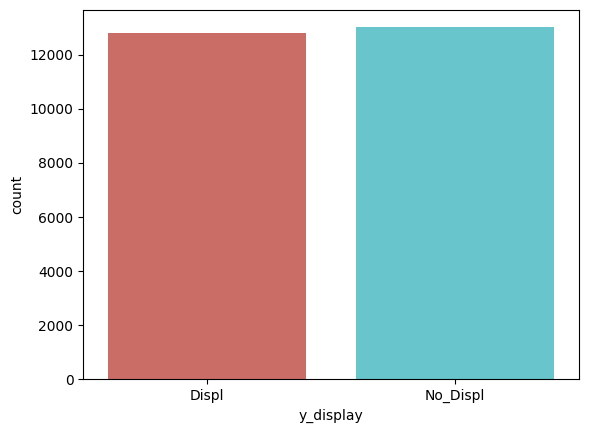

In [11]:
# visualisation
sns.countplot(x='y_display', data=df, palette='hls')
plt.show()

- we don't have an imbalanced dataset.

In [12]:
df["X7_Feature"].value_counts()

X7_Feature
No_Feat    19495
Feat        6287
Name: count, dtype: int64

- since X7_Feature only has two categories: 'No_Feat' and 'Feat', we can use a method like label encoding to convert these categories into 0 and 1. 

In [13]:
# Frequency distribution of 'X5_ENSEIGNE'
enseigne_counts = df['X5_ENSEIGNE'].value_counts()

# Frequency distribution of 'X7_Feature'
feature_counts = df['X7_Feature'].value_counts()

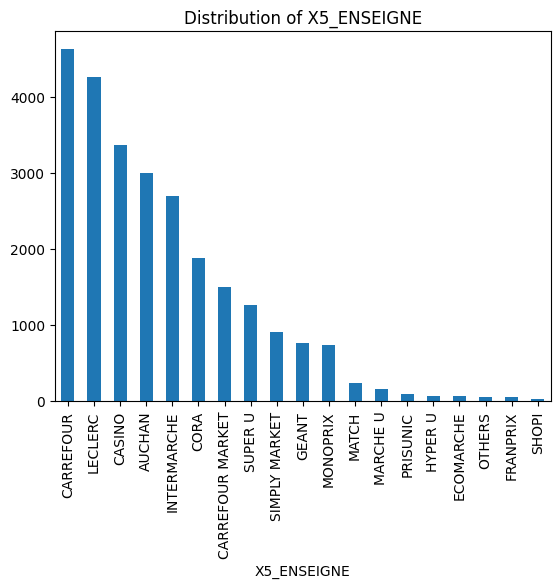

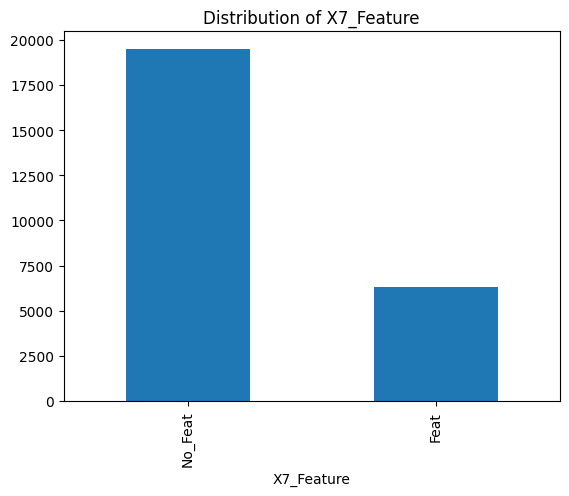

In [14]:
enseigne_counts.plot(kind='bar')
plt.title('Distribution of X5_ENSEIGNE')
plt.show()

feature_counts.plot(kind='bar')
plt.title('Distribution of X7_Feature')
plt.show()

2. Bivariate Exploration:

In [15]:
contingency = pd.crosstab(df['y_display'], df['X7_Feature'])
contingency

X7_Feature,Feat,No_Feat
y_display,,
Displ,5912,6870
No_Displ,375,12625


- Of the items that were displayed ('Displ'), 5912 had the 'Feat' feature and 6870 did not have the feature ('No_Feat').
- Of the items that were not displayed ('No_Displ'), 375 had the 'Feat' feature and 12625 did not have the feature.

In [16]:
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 6571.643703811071
P-value: 0.0


- the p-value is 0.0, which is less than the common significance level of 0.05. This means that we can reject the null hypothesis and conclude that there is a statistically significant relationship between 'X7_Feature' and 'y_display'. 

In [17]:
# X5_ENSEIGNE vs y_display
contingency1 = pd.crosstab(df['y_display'], df['X5_ENSEIGNE'])

# df.groupby(['y_display', 'X5_ENSEIGNE']).size().unstack().plot(kind='bar', stacked=True)

chi2, p, dof, expected = chi2_contingency(contingency1)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 783.3518531669146
P-value: 1.1069799512990182e-154


In [18]:
# X5_ENSEIGNE vs X7_Feature
contingency2 = pd.crosstab(df['X5_ENSEIGNE'], df['X7_Feature'])

chi2, p, dof, expected = chi2_contingency(contingency2)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 282.8030250961965
P-value: 1.6342422115803454e-49


#### Pass to explore the numerical variables

1. Univariate Exploration:

In [19]:
numerical_columns = ['X1_cor_sales_in_vol', 'X2_cor_sales_in_val', 'X3_CA_mag', 'X4_value', 'X6_VenteConv']

In [20]:
df[numerical_columns].describe()

,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X6_VenteConv
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,64641.184431,37.646614,587.855260
std,38.203406,372.649805,54924.645702,23.498949,1821.338396
min,1.000000,1.110000,1693.000000,1.000000,1.000000
25%,2.000000,13.360000,21394.000000,25.000000,50.000000
50%,4.000000,31.050000,51522.000000,32.000000,120.000000
75%,11.000000,87.450000,91000.000000,40.000000,380.000000
max,1475.000000,13589.220000,284844.000000,198.000000,48816.000000


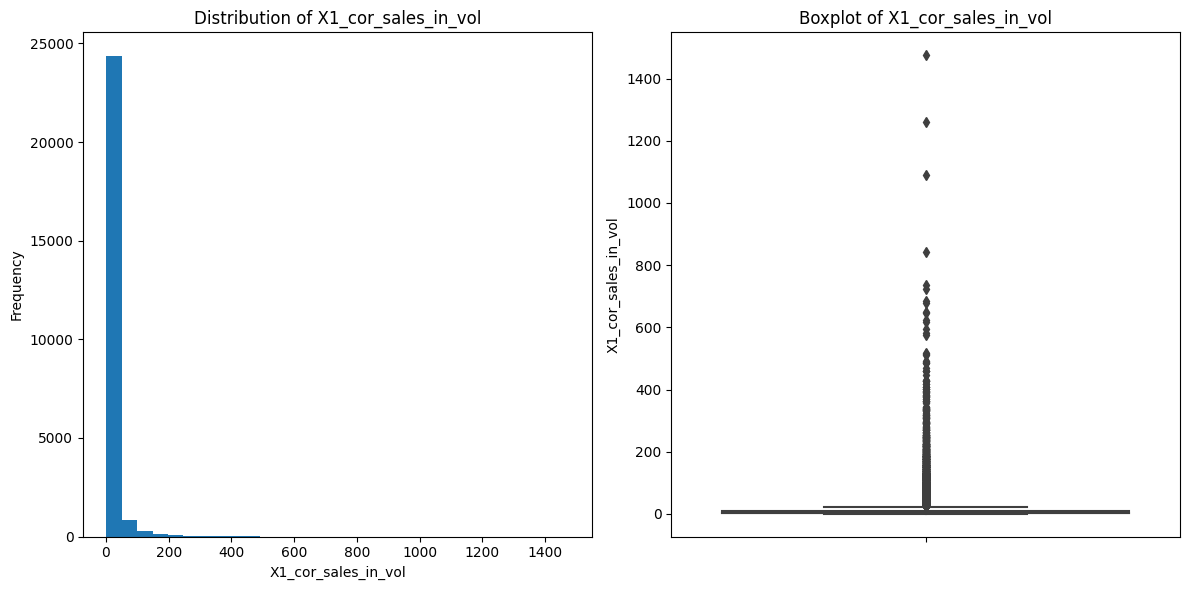

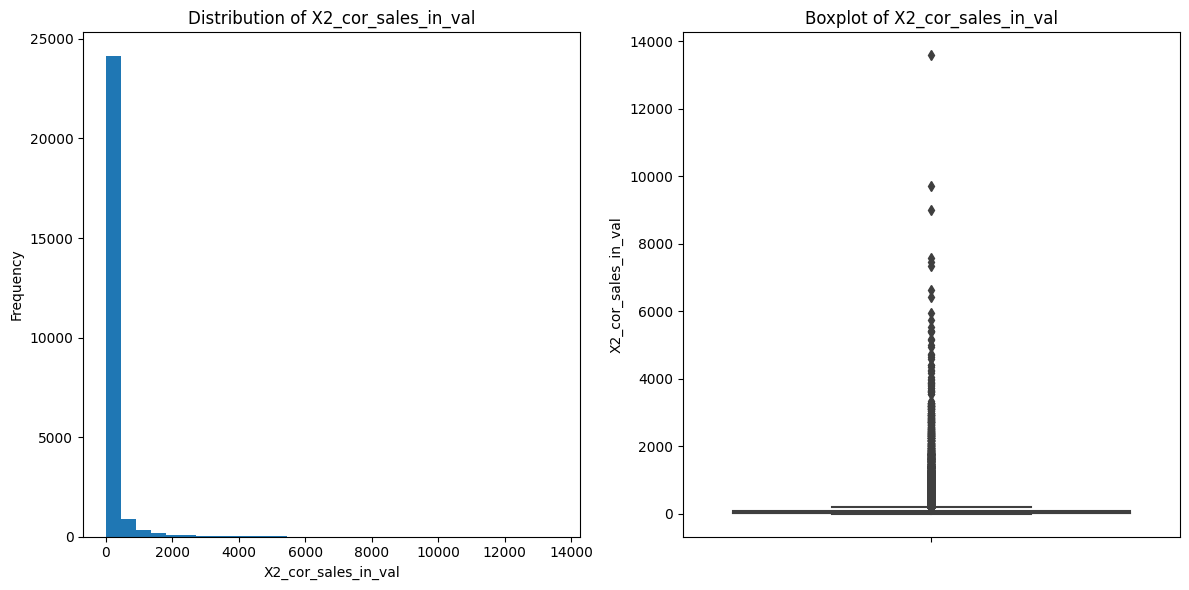

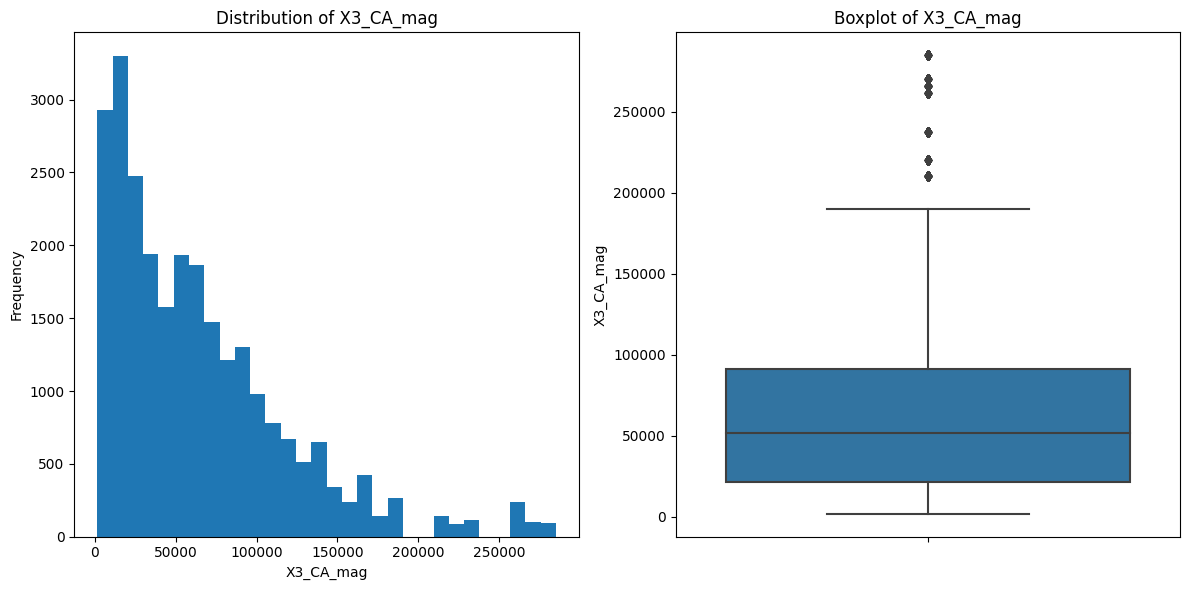

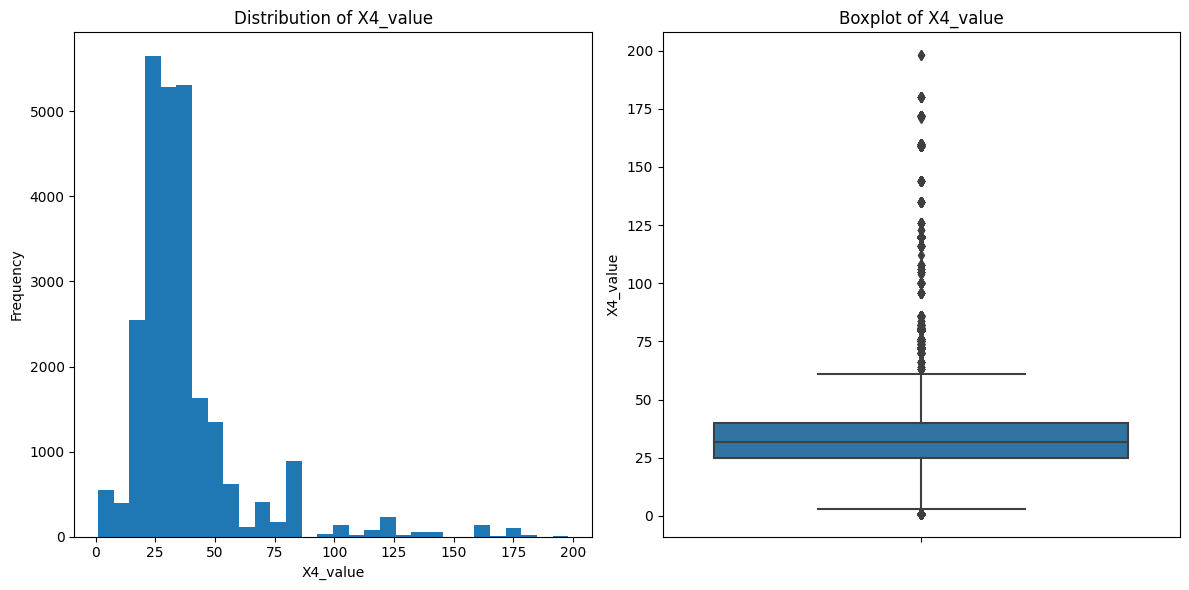

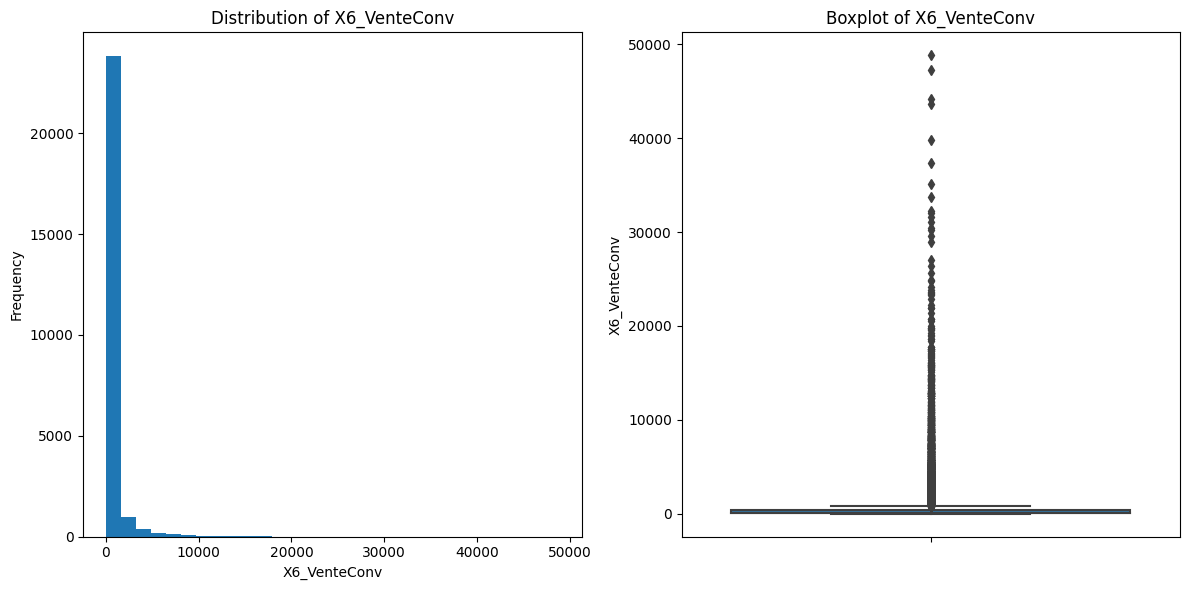

In [21]:
for col in numerical_columns:
    # Create subplots to display histogram and boxplot side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram on the left
    axs[0].hist(df[col], bins=30)
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')

    # Boxplot on the right
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_ylabel(col)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


2. Bivariate Exploration:

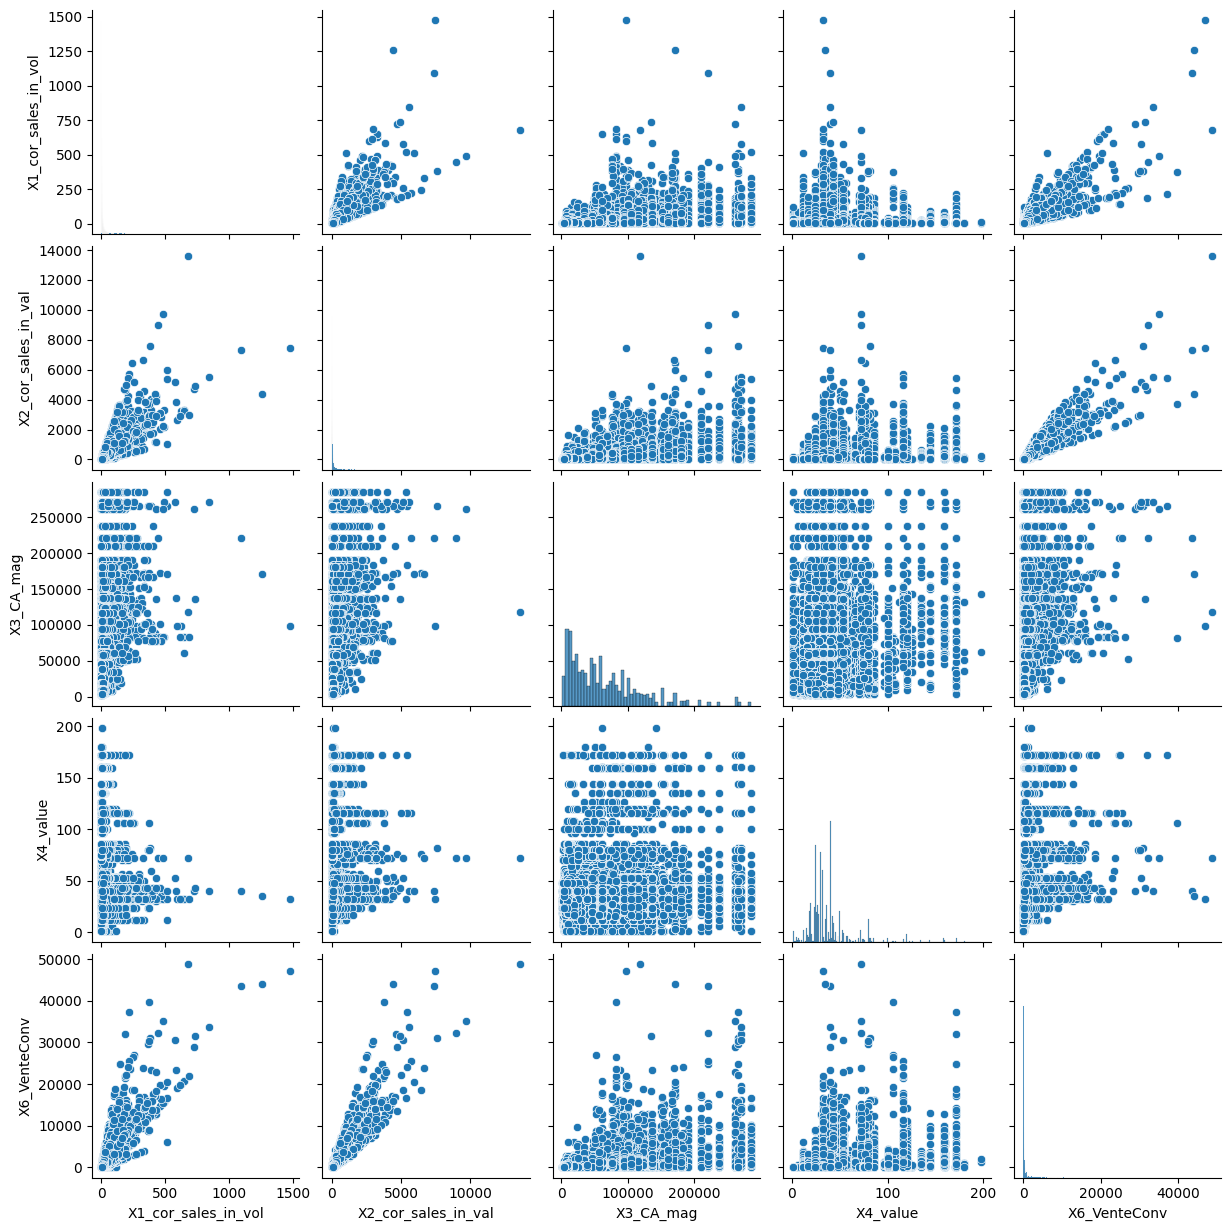

In [22]:
# Pairwise scatterplot matrix for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()

<Axes: >

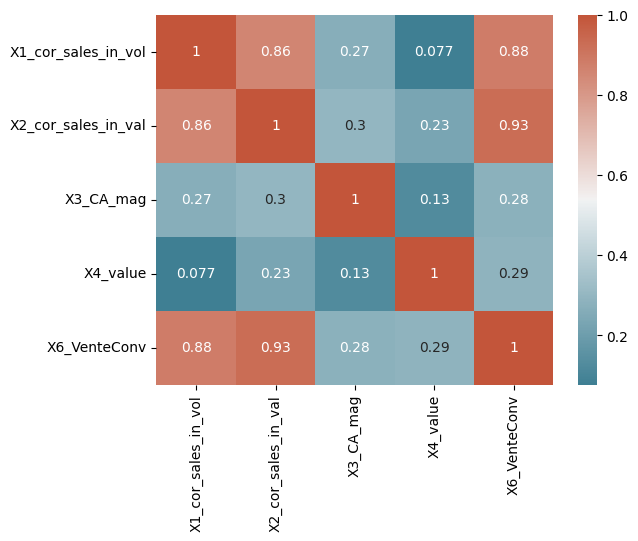

In [23]:
# correlation between numerical features
corr = df[numerical_columns].corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [24]:
corr

,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X6_VenteConv
X1_cor_sales_in_vol,1.000000,0.858353,0.266049,0.077496,0.882588
X2_cor_sales_in_val,0.858353,1.000000,0.297886,0.230587,0.928348
X3_CA_mag,0.266049,0.297886,1.000000,0.127276,0.275925
X4_value,0.077496,0.230587,0.127276,1.000000,0.288883
X6_VenteConv,0.882588,0.928348,0.275925,0.288883,1.000000


#### Data Transformation

1. Handling categorical variables:

In [25]:
df["X5_ENSEIGNE"].value_counts()    

X5_ENSEIGNE
CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply the label encoder to each column
df['y_display'] = le.fit_transform(df['y_display'])
df['X5_ENSEIGNE'] = le.fit_transform(df['X5_ENSEIGNE'])
df['X7_Feature'] = le.fit_transform(df['X7_Feature'])

In [27]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,1,2.0,20.20,47400,36,4,72.0,1
2,1,2.0,11.90,62000,24,10,48.0,1
3,1,8.0,29.52,60661,60,0,480.0,1
4,1,2.0,16.20,59677,19,1,38.0,1
5,1,5.0,62.10,142602,50,4,250.0,1


2. Categorization using MDLPC

In [28]:
X , y = df.iloc[:,[1,2,3,4,6]].values , df.iloc[:,0].values

In [29]:
X

array([[2.0000e+00, 2.0200e+01, 4.7400e+04, 3.6000e+01, 7.2000e+01],
       [2.0000e+00, 1.1900e+01, 6.2000e+04, 2.4000e+01, 4.8000e+01],
       [8.0000e+00, 2.9520e+01, 6.0661e+04, 6.0000e+01, 4.8000e+02],
       ...,
       [1.2000e+01, 8.1720e+01, 4.0330e+03, 3.5000e+01, 4.2000e+02],
       [5.0000e+00, 2.9750e+01, 4.0330e+03, 2.4000e+01, 1.2000e+02],
       [5.0000e+00, 5.2240e+01, 4.0330e+03, 4.0000e+01, 2.0000e+02]])

In [30]:
# Get the number of features in the dataset
num_features = X.shape[1]

# Initialize the MDLP discretizer
# We specify that all features are numeric and should be discretized
discretizer = MDLP_Discretizer(features=np.arange(num_features))

# Fit the discretizer to the data and transform the data
X_discretized = discretizer.fit_transform(X, y)

# Get the cut points used by the discretizer for each feature
cut_points = discretizer._cuts

# Extract the values (lists of cut points) from the dictionary
cut_point_values = cut_points.values()

# Write the cut points to a file
# We use a context manager (the "with" statement) to handle the file opening and closing
with open('disc.txt', 'w') as file:
    for cut_point_list in cut_point_values:
        file.write(str(cut_point_list) + '\n')

In [31]:
# Open the file 'disc.txt' in read mode
with open('disc.txt', 'r') as file:
    # Read all lines in the file
    lines = file.readlines()

    # Initialize an empty list to store the cuts
    list_of_cuts = []

    # Process each line in the file
    for line in lines:
        # Remove square brackets and split the line by commas, convert strings to floats
        cuts = [float(e) for e in line.replace("[", "").replace("]", "").split(",")]
        # Append the cuts to the list_of_cuts
        list_of_cuts.append(cuts)

    # Display the list of cuts
    print(list_of_cuts)

[[4.51, 7.3100000000000005, 9.375, 13.195, 28.5, 47.5], [8.375, 33.545, 67.59, 92.39500000000001, 139.34, 213.635, 587.515], [28722.5, 32738.0, 33144.0, 33585.0, 38646.5, 43828.5, 44406.0, 45848.5, 46307.5, 51511.0, 51544.0, 57174.5, 57374.5, 85611.0, 89561.5, 94439.5, 109168.5, 109746.5], [11.5, 24.5, 25.5, 26.5, 27.5, 29.0, 31.0, 32.5, 33.5, 40.5, 41.5, 42.5, 43.5, 47.0, 56.5, 62.0, 68.0], [15.5, 52.5, 55.0, 59.495000000000005, 74.5, 141.68, 287.5, 289.0, 478.5, 702.5, 926.5, 2047.0]]


In [32]:
for cuts in list_of_cuts:
        print(len(cuts))

6
7
18
17
12


- `X1` has been transformed into a discrete variable with 6 unique values.
- `X2` has been transformed into a discrete variable with 7 unique values.
- `X3` has been transformed into a discrete variable with 18 unique values.
- `X4` has been transformed into a discrete variable with 17 unique values.
- `X6` has been transformed into a discrete variable with 12 unique values.

In [33]:
# X_discretized to dataframe
X_discretized = pd.DataFrame(X_discretized, columns=['X1_cor_sales_in_vol_disc', 'X2_cor_sales_in_val_disc', 'X3_CA_mag_disc', 'X4_value_disc', 'X6_VenteConv_disc'])

In [34]:
X_discretized.head()

,X1_cor_sales_in_vol_disc,X2_cor_sales_in_val_disc,X3_CA_mag_disc,X4_value_disc,X6_VenteConv_disc
0,0.0,1.0,9.0,9.0,4.0
1,0.0,1.0,13.0,1.0,1.0
2,2.0,1.0,13.0,15.0,9.0
3,0.0,1.0,13.0,1.0,1.0
4,1.0,2.0,18.0,14.0,6.0


In [35]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,1,2.0,20.20,47400,36,4,72.0,1
2,1,2.0,11.90,62000,24,10,48.0,1
3,1,8.0,29.52,60661,60,0,480.0,1
4,1,2.0,16.20,59677,19,1,38.0,1
5,1,5.0,62.10,142602,50,4,250.0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y_display            25782 non-null  int32  
 1   X1_cor_sales_in_vol  25782 non-null  float64
 2   X2_cor_sales_in_val  25782 non-null  float64
 3   X3_CA_mag            25782 non-null  int32  
 4   X4_value             25782 non-null  int32  
 5   X5_ENSEIGNE          25782 non-null  int32  
 6   X6_VenteConv         25782 non-null  float64
 7   X7_Feature           25782 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 1.1 MB


In [37]:
# Resetting index of df to start from 0
df.reset_index(drop=True, inplace=True)

# Concatenating df and X_discretized along columns
combined_df = pd.concat([df, X_discretized], axis=1)

In [38]:
combined_df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature,X1_cor_sales_in_vol_disc,X2_cor_sales_in_val_disc,X3_CA_mag_disc,X4_value_disc,X6_VenteConv_disc
0,1,2.0,20.20,47400,36,4,72.0,1,0.0,1.0,9.0,9.0,4.0
1,1,2.0,11.90,62000,24,10,48.0,1,0.0,1.0,13.0,1.0,1.0
2,1,8.0,29.52,60661,60,0,480.0,1,2.0,1.0,13.0,15.0,9.0
3,1,2.0,16.20,59677,19,1,38.0,1,0.0,1.0,13.0,1.0,1.0
4,1,5.0,62.10,142602,50,4,250.0,1,1.0,2.0,18.0,14.0,6.0


In [39]:
desc = df[numerical_columns].describe() 

In [40]:
# Initialize an empty list to store the intervals for each feature
intervals_for_all_features = []

# Iterate over each list of cut points
for k, cut_points in enumerate(list_of_cuts):
    # Initialize an empty list to store the intervals for this feature
    intervals_for_feature = []
    
    # Get the minimum and maximum values for this feature
    min_val, max_val = desc.iloc[3, k], desc.iloc[7, k]
    
    # Add the first interval (from min_val to the first cut point)
    intervals_for_feature.append(f"{np.round(min_val, 2)} _ {cut_points[0]}")
    
    # Add the intervals between each pair of cut points
    for i in range(1, len(cut_points)):
        intervals_for_feature.append(f"{np.round(cut_points[i - 1], 2)} _ {np.round(cut_points[i], 2)}")
    
    # Add the last interval (from the last cut point to max_val)
    intervals_for_feature.append(f"{np.round(cut_points[-1], 2)} _ {np.round(max_val, 2)}")
    
    # Add the intervals for this feature to the main list
    intervals_for_all_features.append(intervals_for_feature)

In [41]:
# Define the transform function
def transform(n, j):
    n = int(n)
    j = int(j)
    return intervals_for_all_features[j][n]

# Get the list of column names from the desc dataframe
list_of_columns = desc.columns

# For each column in the list of columns
for j, column_name in enumerate(list_of_columns):
    # Add a new column to the df dataframe
    # The new column is named by appending 'intervalle' to the original column name
    # The values in the new column are determined by applying the transform function to the corresponding values in the original column
    combined_df[column_name + '_intervalle'] = combined_df[column_name + '_disc'].apply(lambda x: transform(x, j))

In [42]:
combined_df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature,X1_cor_sales_in_vol_disc,X2_cor_sales_in_val_disc,X3_CA_mag_disc,X4_value_disc,X6_VenteConv_disc,X1_cor_sales_in_vol_intervalle,X2_cor_sales_in_val_intervalle,X3_CA_mag_intervalle,X4_value_intervalle,X6_VenteConv_intervalle
0,1,2.0,20.20,47400,36,4,72.0,1,0.0,1.0,9.0,9.0,4.0,1.0 _ 4.51,8.38 _ 33.54,46307.5 _ 51511.0,33.5 _ 40.5,59.5 _ 74.5
1,1,2.0,11.90,62000,24,10,48.0,1,0.0,1.0,13.0,1.0,1.0,1.0 _ 4.51,8.38 _ 33.54,57374.5 _ 85611.0,11.5 _ 24.5,15.5 _ 52.5
2,1,8.0,29.52,60661,60,0,480.0,1,2.0,1.0,13.0,15.0,9.0,7.31 _ 9.38,8.38 _ 33.54,57374.5 _ 85611.0,56.5 _ 62.0,478.5 _ 702.5
3,1,2.0,16.20,59677,19,1,38.0,1,0.0,1.0,13.0,1.0,1.0,1.0 _ 4.51,8.38 _ 33.54,57374.5 _ 85611.0,11.5 _ 24.5,15.5 _ 52.5
4,1,5.0,62.10,142602,50,4,250.0,1,1.0,2.0,18.0,14.0,6.0,4.51 _ 7.31,33.54 _ 67.59,109746.5 _ 284844.0,47.0 _ 56.5,141.68 _ 287.5


In [ ]:
combined_df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature,X1_cor_sales_in_vol_disc,X2_cor_sales_in_val_disc,X3_CA_mag_disc,X4_value_disc,X6_VenteConv_disc,X1_cor_sales_in_vol_intervalle,X2_cor_sales_in_val_intervalle,X3_CA_mag_intervalle,X4_value_intervalle,X6_VenteConv_intervalle
0,1,2.0,20.20,47400,36,4,72.0,1,0.0,1.0,9.0,9.0,4.0,1.0 _ 4.51,8.38 _ 33.54,46307.5 _ 51511.0,33.5 _ 40.5,59.5 _ 74.5
1,1,2.0,11.90,62000,24,10,48.0,1,0.0,1.0,13.0,1.0,1.0,1.0 _ 4.51,8.38 _ 33.54,57374.5 _ 85611.0,11.5 _ 24.5,15.5 _ 52.5
2,1,8.0,29.52,60661,60,0,480.0,1,2.0,1.0,13.0,15.0,9.0,7.31 _ 9.38,8.38 _ 33.54,57374.5 _ 85611.0,56.5 _ 62.0,478.5 _ 702.5
3,1,2.0,16.20,59677,19,1,38.0,1,0.0,1.0,13.0,1.0,1.0,1.0 _ 4.51,8.38 _ 33.54,57374.5 _ 85611.0,11.5 _ 24.5,15.5 _ 52.5
4,1,5.0,62.10,142602,50,4,250.0,1,1.0,2.0,18.0,14.0,6.0,4.51 _ 7.31,33.54 _ 67.59,109746.5 _ 284844.0,47.0 _ 56.5,141.68 _ 287.5


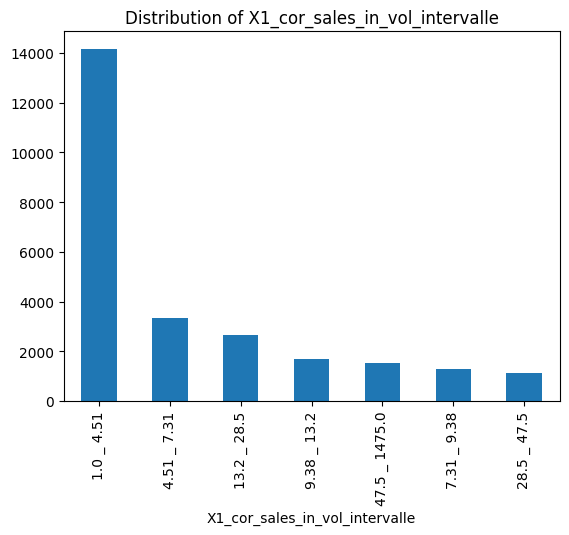

In [43]:
# histogram of X1_cor_sales_in_vol_intervalle
combined_df['X1_cor_sales_in_vol_intervalle'].value_counts().plot(kind='bar')
plt.title('Distribution of X1_cor_sales_in_vol_intervalle')
plt.show()

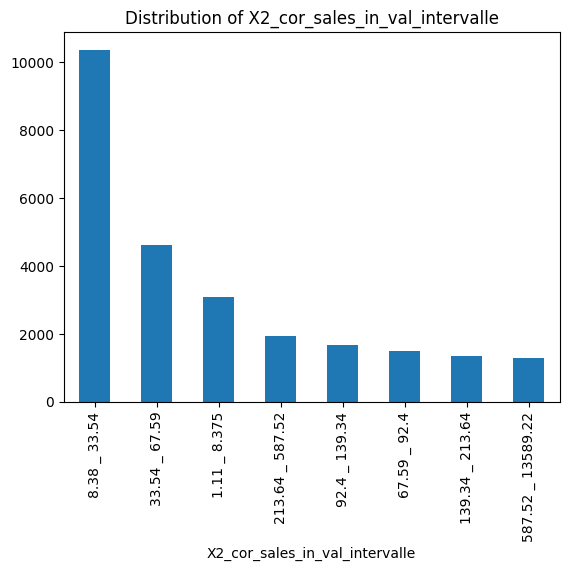

In [44]:
# histogram of X2_cor_sales_in_val_intervalle
combined_df['X2_cor_sales_in_val_intervalle'].value_counts().plot(kind='bar')
plt.title('Distribution of X2_cor_sales_in_val_intervalle')
plt.show()

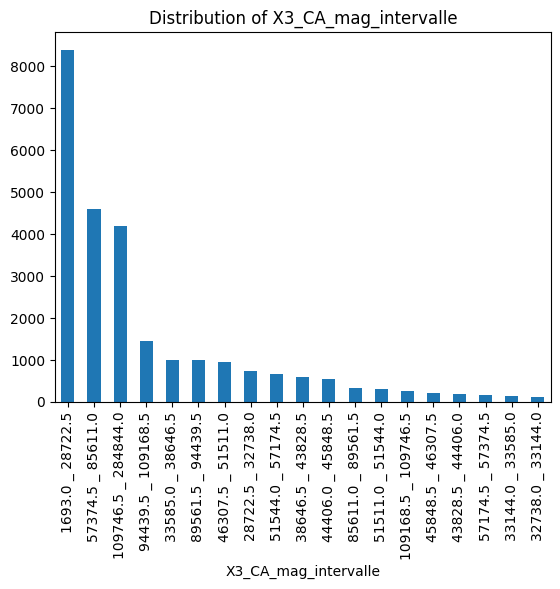

In [45]:
# histogram of X3_CA_mag_intervalle
combined_df['X3_CA_mag_intervalle'].value_counts().plot(kind='bar')
plt.title('Distribution of X3_CA_mag_intervalle')
plt.show()

In [49]:
from scipy.stats import chi2_contingency

# List of variables to test against 'y_display'
variables = ['X1_cor_sales_in_vol_intervalle', 'X2_cor_sales_in_val_intervalle', 'X3_CA_mag_intervalle', 'X4_value_intervalle', 'X6_VenteConv_intervalle']

# List to store results
chi2_results = []

# Iterate over selected variables
for var in variables:
    # Create contingency table
    contingency_table = pd.crosstab(combined_df['y_display'], combined_df[var])
    
    # Perform Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Store the result
    chi2_results.append((var, p))

# Convert results to DataFrame
chi2_results_df = pd.DataFrame(chi2_results, columns=['Variable', 'p-value'])

# Display the results
print(chi2_results_df)

                         Variable        p-value
0  X1_cor_sales_in_vol_intervalle   0.000000e+00
1  X2_cor_sales_in_val_intervalle   0.000000e+00
2            X3_CA_mag_intervalle  4.995166e-136
3             X4_value_intervalle   0.000000e+00
4         X6_VenteConv_intervalle   0.000000e+00


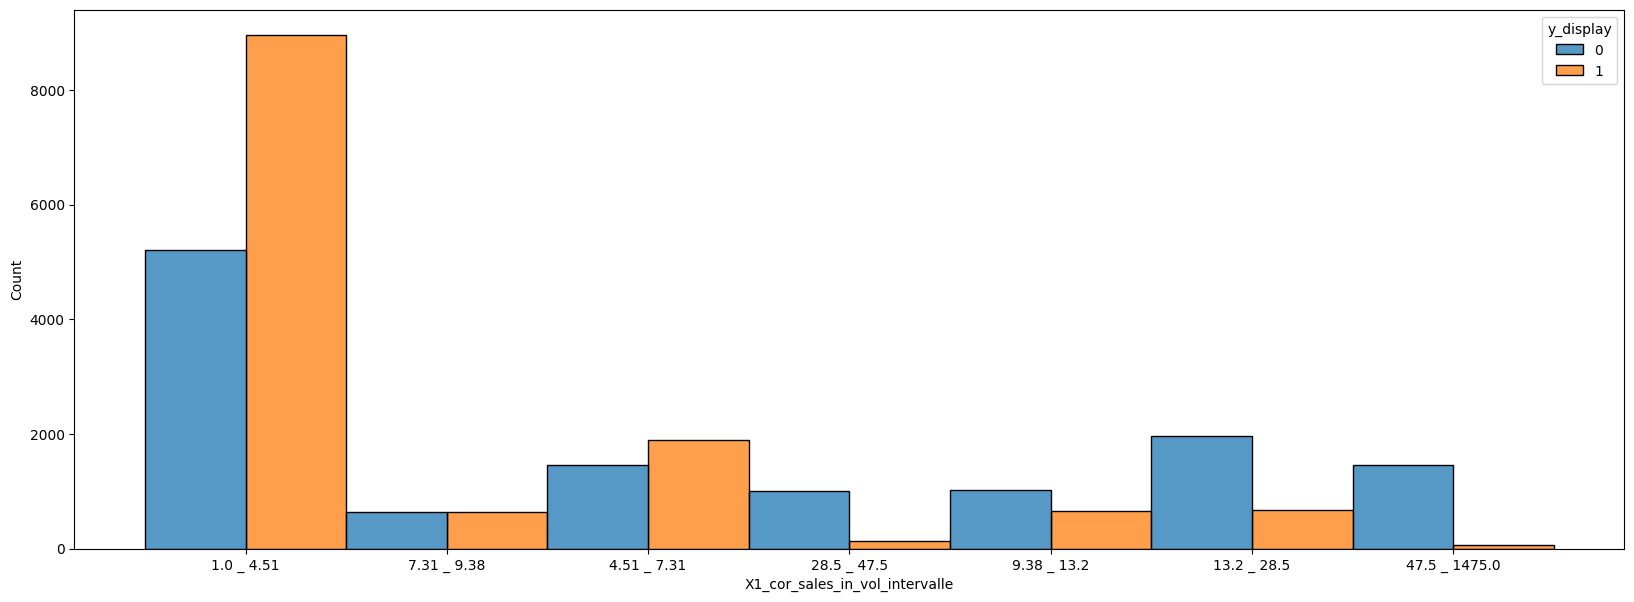

In [60]:
plt.figure(figsize=(20, 7))
sns.histplot(data=combined_df, x=combined_df["X1_cor_sales_in_vol_intervalle"], hue="y_display", multiple="dodge")
plt.show()


#### Data Modeling